In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.CALTECH_101)
Path.BASE_PATH = path
path.ls()

(#102) [Path('headphone'),Path('electric_guitar'),Path('wrench'),Path('dalmatian'),Path('ceiling_fan'),Path('buddha'),Path('wild_cat'),Path('pyramid'),Path('crayfish'),Path('platypus')...]

### Create Datablock and Dataloaders


In [3]:
Db = DataBlock(blocks=(ImageBlock,CategoryBlock),
               get_items = get_image_files,
               splitter = RandomSplitter(valid_pct=0.3, seed=4),  
               get_y=parent_label,
               item_tfms = Resize(460),
               batch_tfms = aug_transforms(size=224, min_scale=0.75))

/opt/conda/envs/fastai/lib/python3.8/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


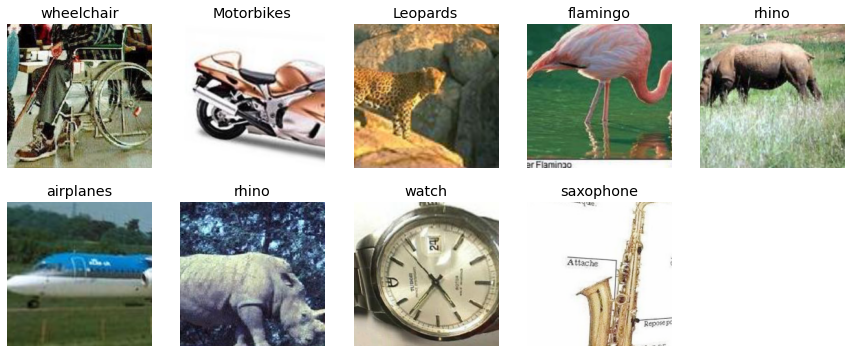

In [4]:
dls = Db.dataloaders(path)
dls.show_batch(nrows=2, ncols=5)

### Check if Datablock was build correctly

In [5]:
Db.summary(path)

Setting-up type transforms pipelines
Found 9144 items
2 datasets of sizes 6401,2743
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/caltech_101/anchor/image_0010.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=270x300
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/caltech_101/anchor/image_0010.jpg
    applying parent_label gives
      anchor
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(7)

Final sample: (PILImage mode=RGB size=270x300, TensorCategory(7))


Found 9144 items
2 datasets of sizes 6401,2743
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline

### Fine-tune model

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

/opt/conda/envs/fastai/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.240277,0.558297,0.162231,01:43


epoch,train_loss,valid_loss,error_rate,time
0,0.643589,0.301317,0.083121,02:12
1,0.338503,0.235679,0.068903,02:12


### Confusion matrix

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
cm_plot = interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm_plot.savefig('caltech_confusion_matrix.png')


In [ ]:
interp.most_confused(min_val=5)

[('Faces_easy', 'Faces', 14),
 ('schooner', 'ketch', 7),
 ('water_lilly', 'lotus', 7),
 ('ketch', 'schooner', 4),
 ('Faces', 'Faces_easy', 3),
 ('brain', 'BACKGROUND_Google', 3),
 ('chair', 'windsor_chair', 3),
 ('crab', 'lobster', 3)]

### Improve model

In [ ]:
#### Learning rate

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(8, base_lr=0.0005)

epoch,train_loss,valid_loss,error_rate,time
0,3.897153,1.467346,0.339774,01:44


epoch,train_loss,valid_loss,error_rate,time
0,1.890532,1.017252,0.250456,02:13
1,1.264896,0.507686,0.130149,02:13
2,0.760011,0.395900,0.112286,02:13
3,0.505611,0.307162,0.087131,02:13
4,0.363429,0.260848,0.076194,02:13
5,0.290739,0.265270,0.075100,02:14
6,0.258665,0.260514,0.075829,02:14


SuggestedLRs(valley=0.0002754228771664202)

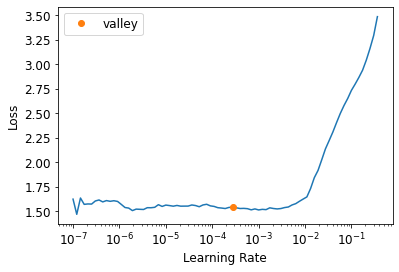

In [ ]:
learn.lr_find()

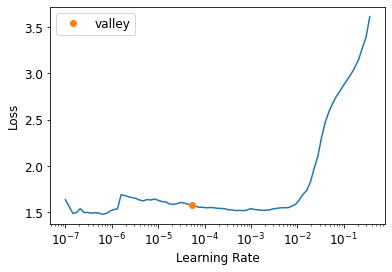

In [ ]:
doc(learn.lr_find())